In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
# 数据加载
train_data = pd.read_csv('./train.csv', index_col=0)
test_data = pd.read_csv('./test.csv', index_col=0)

In [3]:
print(train_data.columns)
print(test_data.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print('查看数据信息：列名、非空个数、类型等')
print(train_data.info())
print('-'*30)
print('查看数据摘要')
print(train_data.describe())
print('-'*30)
print('查看离散数据分布')
print(train_data.describe(include=['O']))
print('-'*30)
print('查看前5条数据')
print(train_data.head())
print('-'*30)
print('查看后5条数据')
print(train_data.tail())

查看数据信息：列名、非空个数、类型等
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
------------------------------
查看数据摘要
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000 

In [5]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [6]:
train_gfare_mean = train_data.groupby('Pclass').mean()['Fare']
train_pclass_list = train_data['Pclass'].to_list()
train_mfare_list = [train_gfare_mean.at[i] for i in train_pclass_list]
train_group_fare = pd.Series(train_mfare_list)
train_data['Fare'].fillna(train_group_fare, inplace=True)

test_gfare_mean = test_data.groupby('Pclass').mean()['Fare']
test_pclass_list = test_data['Pclass'].to_list()
test_mfare_list = [test_gfare_mean.at[i] for i in test_pclass_list]
test_group_fare = pd.Series(test_mfare_list)
test_data['Fare'].fillna(test_group_fare, inplace=True)

In [7]:
print(train_data['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [8]:
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S', inplace=True)

In [9]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [10]:
attr = ['Sex', 'Pclass', 'Embarked']

for feature in attr:
    lbe = LabelEncoder()
    train_data[feature]=lbe.fit_transform(train_data[feature])
    test_data[feature]=lbe.transform(test_data[feature])

In [11]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
extend_features = []

for i in range(len(features)):
    for j in range(i+1, len(features)):
        first = features[i]
        second = features[j]
        if first != second:
            new_feature = first + '_' + second
            train_data[new_feature] = train_data[first].multiply(train_data[second])
            test_data[new_feature] = test_data[first].multiply(test_data[second])
            extend_features.append(new_feature)

features = np.concatenate((features, extend_features), axis = 0)
less_important_features = ['Sex_Fare', 'Age_SibSp', 'Pclass_Embarked', 'SibSp_Fare', 'Age_Patch', 'Parch_Fare', 'SibSp_Parch', 'Sex_Embarked', 'SibSp_Embarked', 'Pclass_SibSp', 'Pclass_Sex', 'Parch_Embarked', 'Sex_SibSp', 'Pclass_Parch', 'Sex_Parch', 'SibSp', 'Age_Parch' ]

features = np.setdiff1d(features, less_important_features)
print(features)
print(train_data[features].info())
print(test_data[features].info())

['Age' 'Age_Embarked' 'Age_Fare' 'Embarked' 'Fare' 'Fare_Embarked' 'Parch'
 'Pclass' 'Pclass_Age' 'Pclass_Fare' 'Sex' 'Sex_Age']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Age              891 non-null float64
Age_Embarked     891 non-null float64
Age_Fare         891 non-null float64
Embarked         891 non-null int32
Fare             891 non-null float64
Fare_Embarked    891 non-null float64
Parch            891 non-null int64
Pclass           891 non-null int64
Pclass_Age       891 non-null float64
Pclass_Fare      891 non-null float64
Sex              891 non-null int32
Sex_Age          891 non-null float64
dtypes: float64(8), int32(2), int64(2)
memory usage: 83.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
Age              418 non-null float64
Age_Embarked     418 non-null float64
Age_Fare         418 non-null float64
Embarked         418 non-null 

In [12]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

param = {'boosting_type':'gbdt',
                         'objective' : 'binary', #
                         #'metric' : 'binary_logloss',
                         'metric' : 'auc',
#                          'metric' : 'self_metric',
                         'learning_rate' : 0.01,
                         'max_depth' : 15,
                         'feature_fraction':0.8,
                         'bagging_fraction': 0.9,
                         'bagging_freq': 8,
                         'lambda_l1': 0.6,
                         'lambda_l2': 0,
#                          'scale_pos_weight':k,
#                         'is_unbalance':True
        }

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data[features], train_data['Survived'], test_size=0.2, random_state=42)
train_dataset = lgb.Dataset(X_train, label=y_train)
valid_dataset = lgb.Dataset(X_valid, label=y_valid)

In [14]:
def show_feature_importance(feature_list, feature_importance):
    # 设定阈值
    fi_threshold = 20
    # 重要特征的下标
    important_idx = np.where(feature_importance > fi_threshold)[0]
    # 特征名称
    important_features = [feature_list[i] for i in important_idx]
    # 重要特征
    sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
    # 可视化
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    plt.subplot(1, 2, 2)
    plt.title('Feature Importance')
    plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], color='r',align='center')
    plt.yticks(pos, [important_features[i] for i in sorted_idx[::-1]])
    plt.xlabel('Relative Importance')
    plt.draw()
    plt.show()

In [15]:
model = lgb.train(param,train_dataset,valid_sets=[train_dataset,valid_dataset],num_boost_round = 10000 ,early_stopping_rounds=8000,verbose_eval=25, categorical_feature=attr)
predict=model.predict(test_data[features])

test_data['Survived']=predict
test_data['Survived']=test_data['Survived'].map(lambda x:1 if x>=0.5 else 0)
test_data[['Survived']].to_csv('submission_lgb.csv')

Training until validation scores don't improve for 8000 rounds
[25]	training's auc: 0.897031	valid_1's auc: 0.887838
[50]	training's auc: 0.910465	valid_1's auc: 0.891763
[75]	training's auc: 0.919474	valid_1's auc: 0.892986
[100]	training's auc: 0.926697	valid_1's auc: 0.888031
[125]	training's auc: 0.930869	valid_1's auc: 0.887709
[150]	training's auc: 0.932504	valid_1's auc: 0.887452
[175]	training's auc: 0.935349	valid_1's auc: 0.88668
[200]	training's auc: 0.938756	valid_1's auc: 0.88462
[225]	training's auc: 0.942252	valid_1's auc: 0.886229
[250]	training's auc: 0.945526	valid_1's auc: 0.884427

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Embarked', 'Pclass', 'Sex']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))



[275]	training's auc: 0.948055	valid_1's auc: 0.886615
[300]	training's auc: 0.951736	valid_1's auc: 0.885457
[325]	training's auc: 0.954241	valid_1's auc: 0.888481
[350]	training's auc: 0.957333	valid_1's auc: 0.889833
[375]	training's auc: 0.959359	valid_1's auc: 0.889189
[400]	training's auc: 0.961165	valid_1's auc: 0.891377
[425]	training's auc: 0.96367	valid_1's auc: 0.889961
[450]	training's auc: 0.965905	valid_1's auc: 0.88713
[475]	training's auc: 0.967947	valid_1's auc: 0.888031
[500]	training's auc: 0.970149	valid_1's auc: 0.887259
[525]	training's auc: 0.971645	valid_1's auc: 0.887773
[550]	training's auc: 0.97325	valid_1's auc: 0.888674
[575]	training's auc: 0.974595	valid_1's auc: 0.889447
[600]	training's auc: 0.975998	valid_1's auc: 0.89009
[625]	training's auc: 0.977284	valid_1's auc: 0.889961
[650]	training's auc: 0.978419	valid_1's auc: 0.889833
[675]	training's auc: 0.979368	valid_1's auc: 0.889447
[700]	training's auc: 0.980293	valid_1's auc: 0.888288
[725]	trainin

[4000]	training's auc: 0.99742	valid_1's auc: 0.871429
[4025]	training's auc: 0.997479	valid_1's auc: 0.871171
[4050]	training's auc: 0.997512	valid_1's auc: 0.871171
[4075]	training's auc: 0.997512	valid_1's auc: 0.871429
[4100]	training's auc: 0.997521	valid_1's auc: 0.871815
[4125]	training's auc: 0.997538	valid_1's auc: 0.870914
[4150]	training's auc: 0.997571	valid_1's auc: 0.871557
[4175]	training's auc: 0.99758	valid_1's auc: 0.871943
[4200]	training's auc: 0.997605	valid_1's auc: 0.871557
[4225]	training's auc: 0.997613	valid_1's auc: 0.871171
[4250]	training's auc: 0.997613	valid_1's auc: 0.8713
[4275]	training's auc: 0.997655	valid_1's auc: 0.871943
[4300]	training's auc: 0.997647	valid_1's auc: 0.871686
[4325]	training's auc: 0.997664	valid_1's auc: 0.871429
[4350]	training's auc: 0.997697	valid_1's auc: 0.870656
[4375]	training's auc: 0.997697	valid_1's auc: 0.87027
[4400]	training's auc: 0.997689	valid_1's auc: 0.869755
[4425]	training's auc: 0.997689	valid_1's auc: 0.8703

[7700]	training's auc: 0.998235	valid_1's auc: 0.867181
[7725]	training's auc: 0.998252	valid_1's auc: 0.866924
[7750]	training's auc: 0.998252	valid_1's auc: 0.866924
[7775]	training's auc: 0.998218	valid_1's auc: 0.86731
[7800]	training's auc: 0.998218	valid_1's auc: 0.866667
[7825]	training's auc: 0.998218	valid_1's auc: 0.866538
[7850]	training's auc: 0.998218	valid_1's auc: 0.866538
[7875]	training's auc: 0.998218	valid_1's auc: 0.866667
[7900]	training's auc: 0.998202	valid_1's auc: 0.866795
[7925]	training's auc: 0.998218	valid_1's auc: 0.866667
[7950]	training's auc: 0.998227	valid_1's auc: 0.866667
[7975]	training's auc: 0.998227	valid_1's auc: 0.866924
[8000]	training's auc: 0.998227	valid_1's auc: 0.866795
[8025]	training's auc: 0.998202	valid_1's auc: 0.866667
[8050]	training's auc: 0.998218	valid_1's auc: 0.867181
[8075]	training's auc: 0.998218	valid_1's auc: 0.867568
Early stopping, best iteration is:
[81]	training's auc: 0.921869	valid_1's auc: 0.894208


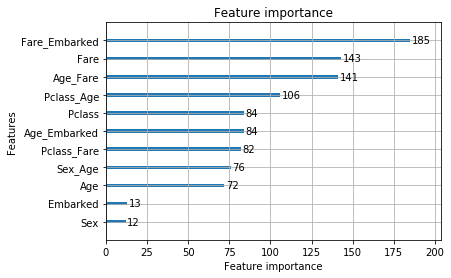

In [16]:
lgb.plot_importance(model)